In [27]:
import pandas as pd

# 파일 경로 설정
book_info_path = r'단행본(도서)정보.csv'
loan_info_path = r'대출정보.csv'


# 파일 읽기 (euc-kr 인코딩)
book_info_df = pd.read_csv(book_info_path, encoding='euc-kr')
loan_info_df = pd.read_csv(loan_info_path, encoding='euc-kr')

# Unnamed 열 제거
book_info_df = book_info_df.loc[:, ~book_info_df.columns.str.contains('^Unnamed')]
loan_info_df = loan_info_df.loc[:, ~loan_info_df.columns.str.contains('^Unnamed')]

# 대출 정보 전처리: 대출일자 추출
loan_info_df['대출일자'] = pd.to_datetime(loan_info_df['대출일시'])

# 대출 요약 정보 생성: 마지막 대출일자와 총 대출 수
loan_summary = loan_info_df.groupby('도서ID').agg(
    마지막대출일자=('대출일자', 'max'),
    총대출수=('대출일자', 'count')
).reset_index()

# 단행본 정보와 대출 요약 정보 병합 (단행본 정보 모든 열 유지)
merged_info = pd.merge(book_info_df, loan_summary, on='도서ID', how='left')

# 대출 기록이 없는 도서 처리
merged_info['마지막대출일자'] = merged_info['마지막대출일자'].fillna('대출 기록 없음')
merged_info['총대출수'] = merged_info['총대출수'].fillna(0).astype(int)

# 결과를 CSV 파일로 저장
output_path = r'통합_정보.csv'
merged_info.to_csv(output_path, index=False, encoding='euc-kr')

# 결과 미리 보기
merged_info.head()


,도서ID,등록일자,수서방법,분류코드,ISBN,서명,저자,출판사,출판년도,소장위치,마지막대출일자,총대출수
0,SS_270312,2017-09-13,학과신청,194,9782020658706,Le courage de la verite :le gouvernement de so...,"Foucault, Michel",Gallimard,2009,4층인문,대출 기록 없음,0
1,SS_233793,2008-10-13,수서정보없음,160,9788995605189,김나지움 논리학입문,"Hegel, Georg Wilhelm Friedrich",용의숲,2008,보존서고,2018-11-26 15:48:04,4
2,SS_233788,2008-10-13,수서정보없음,160,9788995605189,김나지움 논리학입문,"Hegel, Georg Wilhelm Friedrich",용의숲,2008,4층인문,2022-08-23 16:48:14,1
3,SS_075978,2010-09-09,이용자희망,160,9788977757301,선제논리를 향하여,김영정,철학과현실사,2010,4층인문,대출 기록 없음,0
4,SS_297286,2011-06-22,사서선정,160,9788977757301,선제논리를 향하여,김영정,철학과현실사,2010,보존서고,대출 기록 없음,0


In [30]:
# 통합_정보.csv 파일 로드
output_path = r'통합_정보.csv'
merged_info = pd.read_csv(output_path, encoding='euc-kr')

# 소장위치별 도서 수 계산
location_counts = merged_info['소장위치'].value_counts()

# 보존서고와 4층인문의 책 수 확인
preserved_books = location_counts.get('보존서고', 0)
fourth_floor_books = location_counts.get('4층인문', 0)

print(f"보존서고에 있는 책: {preserved_books}권")
print(f"4층인문에 있는 책: {fourth_floor_books}권")

보존서고에 있는 책: 138697권
4층인문에 있는 책: 162454권


In [39]:
# MacOS일 경우
plt.rcParams['font.family'] = 'AppleGothic'

# Windows일 경우
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

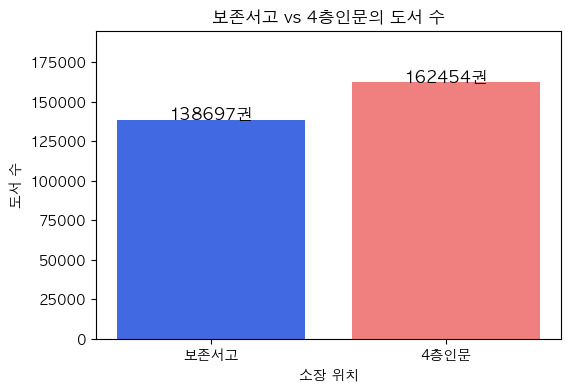

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
output_path = r'통합_정보.csv'
merged_info = pd.read_csv(output_path, encoding='euc-kr')

# 소장위치별 도서 수 계산
location_counts = merged_info['소장위치'].value_counts()

# 보존서고와 4층인문 데이터 추출
locations = ['보존서고', '4층인문']
book_counts = [location_counts.get(loc, 0) for loc in locations]

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(locations, book_counts, color=['royalblue', 'lightcoral'])
plt.xlabel('소장 위치')
plt.ylabel('도서 수')
plt.title('보존서고 vs 4층인문의 도서 수')
plt.ylim(0, max(book_counts) * 1.2)  # 여유 공간 추가

# 값 표시
for i, count in enumerate(book_counts):
    plt.text(i, count + 50, f"{count}권", ha='center', fontsize=12)

plt.show()


In [33]:
# '4층인문'에 있는 책 필터링
fourth_floor_books = merged_info[merged_info['소장위치'] == '4층인문']

# '마지막대출일자'가 '대출 기록 없음'이 아닌 경우만 고려
fourth_floor_books['마지막대출일자'] = pd.to_datetime(fourth_floor_books['마지막대출일자'], errors='coerce')

# 가장 오래된 대출 날짜와 해당 행 찾기
oldest_loan_date = fourth_floor_books['마지막대출일자'].min()
oldest_row = fourth_floor_books[fourth_floor_books['마지막대출일자'] == oldest_loan_date]

# 행 번호 출력
if oldest_row.empty or pd.isna(oldest_loan_date):
    print("4층인문에 있는 책 중 대출 기록이 없습니다.")
else:
    print(f"4층인문에 있는 책 중 가장 대출일자가 오래된 날짜: {oldest_loan_date.date()}")
    print(f"해당 데이터의 행 번호: {oldest_row.index.tolist()}")


/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_39122/2300858549.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fourth_floor_books['마지막대출일자'] = pd.to_datetime(fourth_floor_books['마지막대출일자'], errors='coerce')


4층인문에 있는 책 중 가장 대출일자가 오래된 날짜: 2004-11-01
해당 데이터의 행 번호: [202402]


/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_39122/2300858549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_floor_books['마지막대출일자'] = pd.to_datetime(fourth_floor_books['마지막대출일자'], errors='coerce')


In [34]:
import re
import pandas as pd

# NA 값을 처리 (groupby를 위한 열에서 누락된 값 방지)
merged_info[['서명', '출판사', '출판년도', '저자', '분류코드']] = merged_info[['서명', '출판사', '출판년도', '저자', '분류코드']].fillna('')

# '마지막대출일자'를 datetime 형식으로 변환
merged_info['마지막대출일자'] = pd.to_datetime(merged_info['마지막대출일자'], errors='coerce')

# 중복된 책 정보를 합침 (분류코드를 첫 번째 값으로 유지)
grouped_books = merged_info.groupby(['서명', '저자', '출판사', '출판년도']).agg(
    총대출수=('총대출수', 'sum'),  # 총 대출 수 합산
    마지막대출일자=('마지막대출일자', 'max'),  # 가장 최근 대출일자 선택
    중복책권수=('서명', 'size'),  # 중복된 행 수
    분류코드=('분류코드', 'first'),  # 첫 번째 분류코드 유지 (중복 없이)
    도서ID=('도서ID', lambda x: ', '.join(x.astype(str)))  # 중복된 도서 ID를 문자열로 묶음
).reset_index()

# 마지막대출일자를 다시 문자열로 변환 (필요시)
grouped_books['마지막대출일자'] = grouped_books['마지막대출일자'].dt.strftime('%Y-%m-%d').fillna('')

# 연도를 숫자로만 바꾸는 함수 정의
def clean_year(year):
    match = re.search(r'\d{4}', str(year))
    return match.group(0) if match else year

# 출판년도 컬럼 변환
grouped_books["출판년도"] = grouped_books["출판년도"].apply(clean_year)

# 결과 미리 보기
print(grouped_books.head())

# 결과 저장 (필요시)
output_path = '통합_정보_합침.csv'
grouped_books.to_csv(output_path, index=False, encoding='euc-kr')


/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_39122/1579334383.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_info['마지막대출일자'] = pd.to_datetime(merged_info['마지막대출일자'], errors='coerce')


                                                  서명                    저자  \
0  "Das Recht kann nicht ungerecht sein …" :Beitr...           Li, Wenchao   
1  "Der Zusammenhang der Dinge" :Weltgleichnis un...       Gebhard, Walter   
2  "Ethik und Asthetik sind Eins" :Beitrage zu Wi...  Lutterfelds, Wilhelm   
3  "God ordained this war" :sermons on the sectio...  Chesebrough, David B   
4                    "Huis clos" de Jean-Paul Sartre        Bishop, Thomas   

                                  출판사  출판년도  총대출수     마지막대출일자  중복책권수  \
0                Franz Steiner Verlag  2015     1  2016-06-07      1   
1                         M. Niemeyer  1984     0                  1   
2                          Peter Lang  2007     1  2017-12-12      1   
3  University of South Carolina Press  1991     0                  1   
4                            Hachette  1979     2  2017-05-22      1   

        분류코드  
0        193  
1        193  
2  111.85092  
3  252.00973  
4        448  


In [45]:
# 파일 경로 설정
loan_info_path = '대출정보.csv'  # 대출 정보 파일 경로
merged_info_path = '통합_정보.csv'  # 통합 정보 파일 경로

# 데이터 로드
loan_info = pd.read_csv(loan_info_path, encoding='euc-kr')
merged_info = pd.read_csv(merged_info_path, encoding='euc-kr')

# 1. 대출일시에서 연도를 추출
loan_info['대출연도'] = pd.to_datetime(loan_info['대출일시'], errors='coerce').dt.year

# 2. 연대를 분류하는 함수 정의
def classify_decade(year):
    if pd.isna(year):
        return 'Unknown'
    elif 2000 <= year < 2010:
        return '2000s'
    elif 2010 <= year < 2020:
        return '2010s'
    elif 2020 <= year < 2030:
        return '2020s'
    else:
        return 'Others'

# 연대 정보 추가
loan_info['연대'] = loan_info['대출연도'].apply(classify_decade)

# 3. 십진분류 생성: 첫 두 자리 + 0 생성
def generate_decimal_classification(code):
    try:
        code = str(code).zfill(3)  # 항상 세 자리로 보정
        decimal_code = code[:2] + '0'  # 첫 두 자리 추출 후 마지막에 0 추가
        return decimal_code
    except:
        return ''

# 원본 '분류코드'와 '십진분류' 추가
merged_info['십진분류'] = merged_info['분류코드'].apply(generate_decimal_classification)

# 4. 통합 정보에서 중복된 책 정보를 통합
merged_info[['서명', '출판사', '출판년도', '저자', '분류코드', '십진분류']] = merged_info[['서명', '출판사', '출판년도', '저자', '분류코드', '십진분류']].fillna('')
grouped_books = merged_info.groupby(['서명', '저자', '출판사', '출판년도', '분류코드', '십진분류']).agg(
    총대출수=('총대출수', 'sum'),
    마지막대출일자=('마지막대출일자', 'max'),
    중복책권수=('서명', 'size')
).reset_index()

# 5. 대출 정보와 통합 정보 병합
loan_info_with_titles = pd.merge(loan_info, merged_info[['서명', '도서ID']], on='도서ID', how='left')

# 6. 서명과 연대별 대출 횟수 집계
decade_loans = loan_info_with_titles.groupby(['서명', '연대']).size().reset_index(name='연대별대출횟수')

# 7. 연대별 대출 횟수를 피벗 형태로 변환
pivot_loans = decade_loans.pivot(index='서명', columns='연대', values='연대별대출횟수').fillna(0)
pivot_loans = pivot_loans.reset_index()

# 8. 통합 정보와 연대별 대출 횟수 병합
final_data = pd.merge(grouped_books, pivot_loans, on='서명', how='left')

# 9. NA 값 처리
final_data = final_data.fillna(0)

# 결과를 CSV 파일로 저장
final_data.to_csv('통합_정보_연대별_대출횟수.csv', index=False, encoding='euc-kr')

# 결과 확인
print(final_data.head())


                                                  서명                    저자  \
0  "Das Recht kann nicht ungerecht sein …" :Beitr...           Li, Wenchao   
1  "Der Zusammenhang der Dinge" :Weltgleichnis un...       Gebhard, Walter   
2  "Ethik und Asthetik sind Eins" :Beitrage zu Wi...  Lutterfelds, Wilhelm   
3  "God ordained this war" :sermons on the sectio...  Chesebrough, David B   
4                    "Huis clos" de Jean-Paul Sartre        Bishop, Thomas   

                                  출판사    출판년도       분류코드 십진분류  총대출수  \
0                Franz Steiner Verlag  [2015]        193  190     1   
1                         M. Niemeyer    1984        193  190     0   
2                          Peter Lang   c2007  111.85092  110     1   
3  University of South Carolina Press   c1991  252.00973  250     0   
4                            Hachette    1979        448  440     2   

               마지막대출일자  중복책권수  2000s  2010s  2020s  
0  2016-06-07 14:41:30      1    0.0    1.0    0.0 

In [36]:
# CSV 파일 로드
file_path = '통합_정보_연대별_대출횟수.csv'  # 파일 경로
data = pd.read_csv(file_path, encoding='euc-kr')

# 연대별 대출 데이터 컬럼 추출 (2000s, 2010s, 2020s)
decade_columns = ['2000s', '2010s', '2020s']

# '십진분류' 데이터를 정수형 문자열로 통일
data['십진분류'] = data['십진분류'].apply(lambda x: str(x).split('.')[0].zfill(3))

# 결과 저장용 리스트
top_5_by_decade = []

# 각 연대별로 처리
for decade in decade_columns:
    temp = data[['십진분류', decade]].copy()  # 십진분류와 해당 연대 대출 데이터만 추출
    temp = temp[temp[decade] > 0]  # 대출 횟수가 0보다 큰 경우만 필터링
    temp = temp.groupby('십진분류')[decade].sum().reset_index()  # 십진분류별 대출 합계
    temp = temp.sort_values(by=decade, ascending=False).head(5)  # 대출 횟수 기준 상위 5개 추출
    temp['연대'] = decade  # 연대 정보 추가
    top_5_by_decade.append(temp)

# 결과 출력
for result in top_5_by_decade:
    decade = result['연대'].iloc[0]
    print(f"\n--- {decade} 상위 5개 십진분류 ---")
    print(result[['십진분류', decade]])



--- 2000s 상위 5개 십진분류 ---
   십진분류    2000s
14  150  47859.0
60  950  47451.0
17  180  36980.0
56  910  32711.0
34  420  22350.0

--- 2010s 상위 5개 십진분류 ---
   십진분류     2010s
69  910  136158.0
15  150  114596.0
73  950   84658.0
18  180   80709.0
39  420   65773.0

--- 2020s 상위 5개 십진분류 ---
   십진분류    2020s
14  150  28718.0
21  220  17959.0
17  180  13327.0
69  950  11434.0
60  800  10759.0


/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_39122/2871806412.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_data, x='십진분류', y=decade, ax=ax, palette='Set2')
/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_39122/2871806412.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_data, x='십진분류', y=decade, ax=ax, palette='Set2')
/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_39122/2871806412.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_data, x='십진분류', y=decade, 

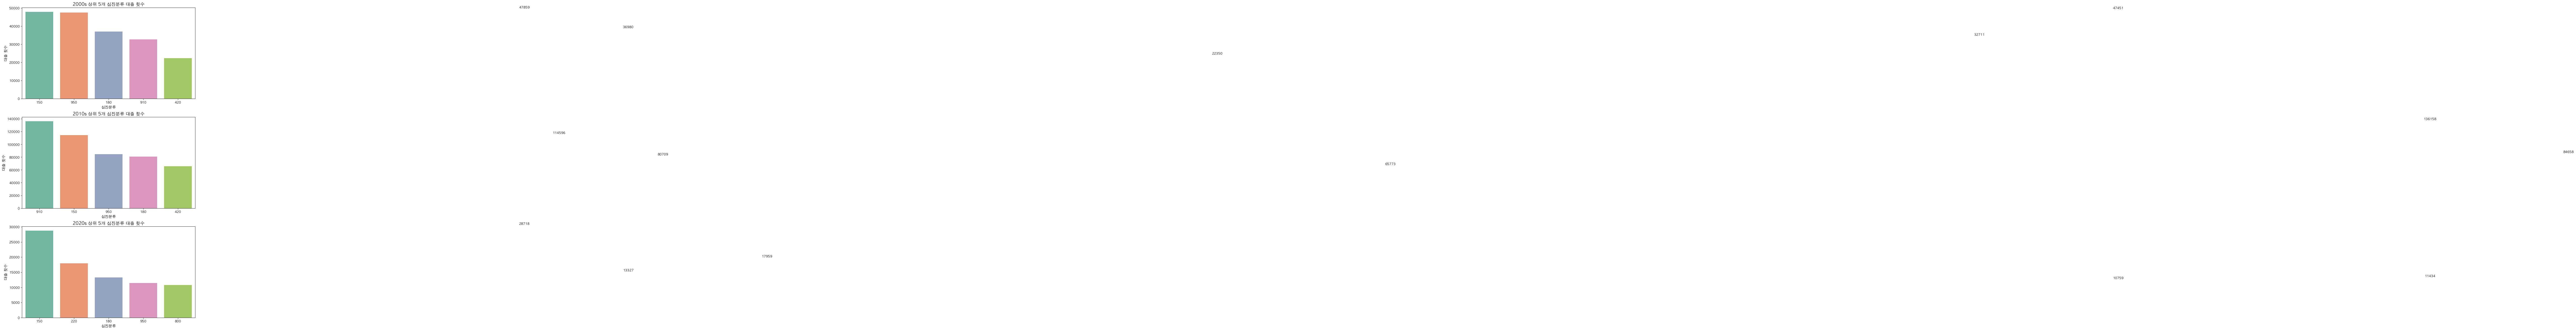

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
file_path = '통합_정보_연대별_대출횟수.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 연대별 대출 데이터 컬럼 추출
decade_columns = ['2000s', '2010s', '2020s']

# '십진분류' 데이터를 정수형 문자열로 통일
data['십진분류'] = data['십진분류'].apply(lambda x: str(x).split('.')[0].zfill(3))

# 결과 저장용 리스트
top_5_by_decade = []

# 각 연대별로 처리
for decade in decade_columns:
    temp = data[['십진분류', decade]].copy()
    temp = temp[temp[decade] > 0]  
    temp = temp.groupby('십진분류')[decade].sum().reset_index()  
    temp = temp.sort_values(by=decade, ascending=False).head(5)  
    temp['연대'] = decade  
    top_5_by_decade.append(temp)

# 데이터프레임 병합
df_top5 = pd.concat(top_5_by_decade)

# 세 개의 서브플롯 생성
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# 각 연대별로 처리하여 시각화
for idx, decade in enumerate(decade_columns):
    ax = axes[idx]
    decade_data = df_top5[df_top5['연대'] == decade]  # 해당 연대 데이터 필터링
    sns.barplot(data=decade_data, x='십진분류', y=decade, ax=ax, palette='Set2')
    
    # 그래프 제목 및 라벨 설정
    ax.set_title(f'{decade} 상위 5개 십진분류 대출 횟수', fontsize=14)
    ax.set_xlabel('십진분류', fontsize=12)
    ax.set_ylabel('대출 횟수', fontsize=12)
    
    # 값 표시
    for i, row in decade_data.iterrows():
        ax.text(i, row[decade] + 2000, str(int(row[decade])), ha='center', fontsize=10)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# CSV 파일 로드
file_path = '통합_정보_연대별_대출횟수.csv'  # 파일 경로
data = pd.read_csv(file_path, encoding='euc-kr')

# 연대별 대출 데이터 컬럼 추출 (2000s, 2010s, 2020s)
decade_columns = ['2000s', '2010s', '2020s']

# '십진분류' 데이터를 정수형 문자열로 통일
data['십진분류'] = data['십진분류'].apply(lambda x: str(x).split('.')[0].zfill(3))

# 십진분류별로 대출 데이터를 합산
grouped_data = data.groupby('십진분류')[decade_columns].sum().reset_index()

# 대출 수 증가율 계산 (2000s 대출 수가 0인 경우 제외)
grouped_data = grouped_data[grouped_data['2000s'] > 0]  # 2000s 대출 수가 0인 행 제거
grouped_data['증가율'] = (grouped_data['2020s'] - grouped_data['2000s']) / grouped_data['2000s']

# 증가율 기준으로 상위 20개 추출
result = grouped_data.sort_values(by='증가율', ascending=False).head(20).reset_index(drop=True)

# 결과 출력
print("\n--- 연대별 대출 수 증가율 상위 20개 십진분류 ---")
print(result[['십진분류', '증가율', '2000s', '2020s']])


C:\Users\songbh0304\AppData\Local\Temp\ipykernel_21552\244434297.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='euc-kr')



--- 연대별 대출 수 증가율 상위 20개 십진분류 ---
   십진분류       증가율    2000s    2020s
0   450  4.333333      3.0     16.0
1   480  2.629630     27.0     98.0
2   002  1.285714      7.0     16.0
3   510  1.200000      5.0     11.0
4   060  1.054054     74.0    152.0
5   470  0.975000     40.0     79.0
6   690  0.937500     32.0     62.0
7   001  0.866720   1253.0   2339.0
8   490  0.575419    179.0    282.0
9   220  0.518976  11831.0  17971.0
10  460  0.354839    155.0    210.0
11  000  0.314607   1157.0   1521.0
12  730  0.194313    211.0    252.0
13  110  0.099061   2342.0   2574.0
14  120  0.076806   2630.0   2832.0
15  340  0.000000      6.0      6.0
16  740 -0.026680   6222.0   6056.0
17  140 -0.160241   1660.0   1394.0
18  410 -0.245057  13503.0  10194.0
19  190 -0.278657  13967.0  10075.0


1 450	4.333333	3.0	16.0	이탈리아, 루마니아어
2 480	2.629630	27.0	98.0	고대, 현대 그리스어
3 002	1.285714	7.0	16.0	총류 (컴퓨터 과학, 지식, 시스템)
4 510	1.200000	5.0	11.0	수학
5 060	1.054054	74.0	152.0	협회, 박물관학
6 470	0.975000	40.0	79.0	라틴과 이탤릭 언어
7 690	0.937500	32.0	62.0	건축
8 001	0.866720	1253.0	2339.0	컴퓨터 과학, 정보 총류
9 490	0.575419	179.0	282.0	다른 기타 언어
10 220	0.518976	11831.0	17971.0	성서
11 460	0.354839	155.0	210.0	스페인, 포르투갈어
12 000	0.314607	1157.0	1521.0	컴퓨터 과학, 정보 총류
13 730	0.194313	211.0	252.0	조각품, 도예와 금속제품
14 110	0.099061	2342.0	2574.0	형이상학
15 120	0.076806	2630.0	2832.0	인식론
16 340	0.000000	6.0	6.0	법학
17 740	-0.026680	6222.0	6056.0	인쇄예술
18 140	-0.160241	1660.0	1394.0	철학파
19 410	-0.245057	13503.0	10194.0	언어학
20 190	-0.278657	13967.0	10075.0	현대 서양철학



/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_39122/1848472264.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='십진분류', y='증가율', data=result, palette='viridis')


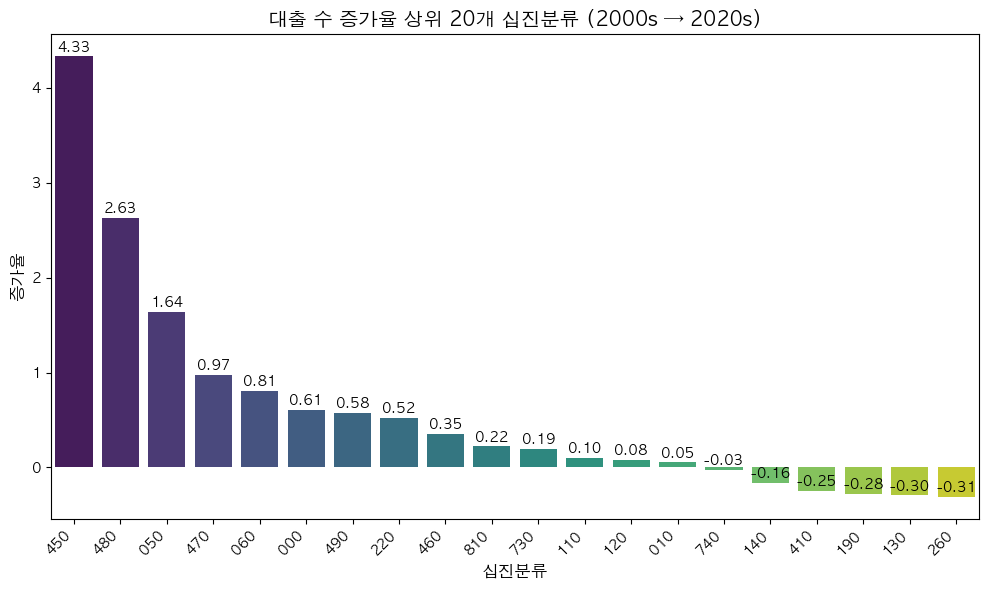

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
file_path = '통합_정보_연대별_대출횟수.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 연대별 대출 데이터 컬럼 추출 (2000s, 2010s, 2020s)
decade_columns = ['2000s', '2010s', '2020s']

# '십진분류' 데이터를 정수형 문자열로 통일
data['십진분류'] = data['십진분류'].apply(lambda x: str(x).split('.')[0].zfill(3))

# 십진분류별로 대출 데이터를 합산
grouped_data = data.groupby('십진분류')[decade_columns].sum().reset_index()

# 대출 수 증가율 계산 (2000s 대출 수가 0인 경우 제외)
grouped_data = grouped_data[grouped_data['2000s'] > 0]  # 2000s 대출 수가 0인 행 제거
grouped_data['증가율'] = (grouped_data['2020s'] - grouped_data['2000s']) / grouped_data['2000s']

# 증가율 기준으로 상위 20개 추출
result = grouped_data.sort_values(by='증가율', ascending=False).head(20).reset_index(drop=True)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='십진분류', y='증가율', data=result, palette='viridis')

# 그래프 제목 및 라벨 설정
plt.title('대출 수 증가율 상위 20개 십진분류 (2000s → 2020s)', fontsize=14)
plt.xlabel('십진분류', fontsize=12)
plt.ylabel('증가율', fontsize=12)

# X축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 값 표시
for i, row in result.iterrows():
    plt.text(i, row['증가율'] + 0.05, f"{row['증가율']:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# CSV 파일 로드
file_path = '통합_정보_연대별_대출횟수.csv'  # 파일 경로
data = pd.read_csv(file_path, encoding='euc-kr')

# 연대별 대출 데이터 컬럼 추출 (2000s, 2010s, 2020s)
decade_columns = ['2000s', '2010s', '2020s']

# '십진분류' 데이터를 정수형 문자열로 통일
data['십진분류'] = data['십진분류'].apply(lambda x: str(x).split('.')[0].zfill(3))

# 십진분류별로 대출 데이터를 합산
grouped_data = data.groupby('십진분류')[decade_columns].sum().reset_index()

# 대출 수 증가율 계산 (2000s 대출 수가 0인 경우 제외)
grouped_data = grouped_data[grouped_data['2000s'] > 0]  # 2000s 대출 수가 0인 행 제거
grouped_data['증가율'] = (grouped_data['2020s'] - grouped_data['2000s']) / grouped_data['2000s']

# 증가율 기준으로 하위 20개 추출
result = grouped_data.sort_values(by='증가율', ascending=True).head(20).reset_index(drop=True)

# 결과 출력
print("\n--- 연대별 대출 수 증가율 하위 20개 십진분류 ---")
print(result[['십진분류', '증가율', '2000s', '2020s']])



--- 연대별 대출 수 증가율 하위 20개 십진분류 ---
   십진분류       증가율    2000s    2020s
0   360 -1.000000      5.0      0.0
1   760 -0.854167     96.0     14.0
2   990 -0.835294     85.0     14.0
3   970 -0.814758   1965.0    364.0
4   080 -0.808668   3115.0    596.0
5   920 -0.791874   2412.0    502.0
6   910 -0.786158  32711.0   6995.0
7   950 -0.759036  47451.0  11434.0
8   030 -0.753222   1552.0    383.0
9   980 -0.751295    193.0     48.0
10  390 -0.743874   5673.0   1453.0
11  770 -0.742306   3217.0    829.0
12  620 -0.730769     26.0      7.0
13  440 -0.726134   1676.0    459.0
14  940 -0.710572  11502.0   3329.0
15  930 -0.707226   2671.0    782.0
16  300 -0.688312     77.0     24.0
17  900 -0.658513  15699.0   5361.0
18  750 -0.641807   5444.0   1950.0
19  180 -0.639616  36980.0  13327.0


하위 20순위
1	360	-1.000000	5.0	0.0	사회서비스
2	030	-0.996212	528.0	2.0	백과사전
3	710	-0.945122	164.0	9.0	도시계획, 조경술
4	070	-0.939394	66.0	4.0	뉴스 매체, 저널리즘, 출판
5	320	-0.934211	76.0	5.0	정치학
6	600	-0.923077	13.0	1.0	기술
7	500	-0.888889	9.0	1.0	과학
8	760	-0.854167	96.0	14.0	제작술
9	990	-0.835294	85.0	14.0	기타지역 역사
10	970	-0.814758	1965.0	364.0	북아메리카 역사
11	080	-0.808751	2651.0	507.0	일반전집
12	810	-0.794926	473.0	97.0	미국문학
13	920	-0.791874	2412.0	502.0	전기와 계보학
14	910	-0.786158	32711.0	6995.0	지리와 여행
15	950	-0.759036	47451.0	11434.0	아시아 역사
16	980	-0.746269	201.0	51.0	남아메리카 역사
17	770	-0.742306	3217.0	829.0	사진술
18	620	-0.730769	26.0	7.0	공학
19	390	-0.729596	5673.0	1534.0	관습, 에티켓과 민속전통
20	440	-0.726134	1676.0	459.0	프랑스 관련언어

/var/folders/2g/9_1xks7j21j8_vjr52g7g8hr0000gn/T/ipykernel_39122/3604718214.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='십진분류', y='증가율', data=result, palette='coolwarm')


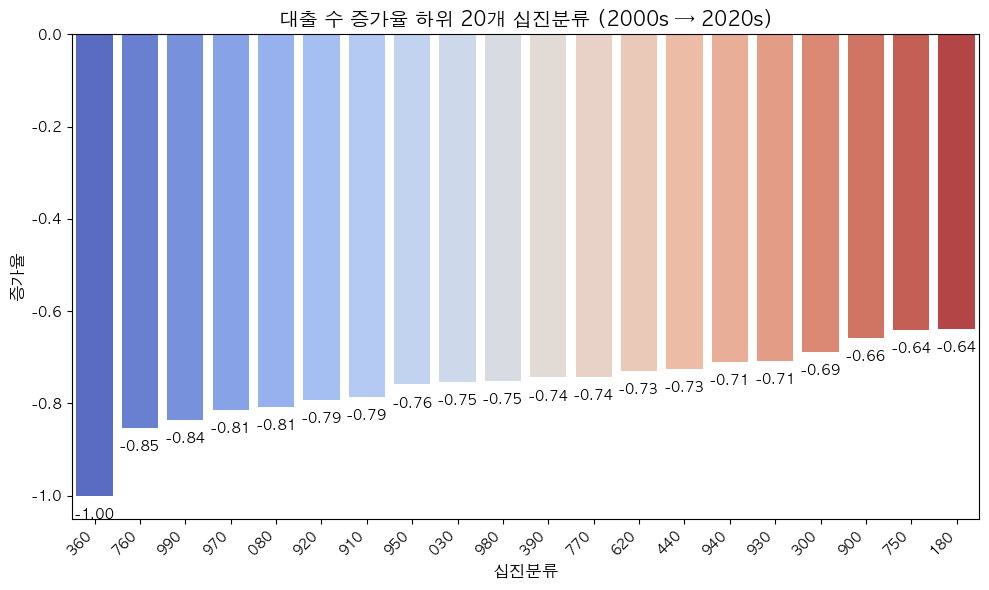

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
file_path = '통합_정보_연대별_대출횟수.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 연대별 대출 데이터 컬럼 추출 (2000s, 2010s, 2020s)
decade_columns = ['2000s', '2010s', '2020s']

# '십진분류' 데이터를 정수형 문자열로 통일
data['십진분류'] = data['십진분류'].apply(lambda x: str(x).split('.')[0].zfill(3))

# 십진분류별로 대출 데이터를 합산
grouped_data = data.groupby('십진분류')[decade_columns].sum().reset_index()

# 대출 수 증가율 계산 (2000s 대출 수가 0인 경우 제외)
grouped_data = grouped_data[grouped_data['2000s'] > 0]  # 2000s 대출 수가 0인 행 제거
grouped_data['증가율'] = (grouped_data['2020s'] - grouped_data['2000s']) / grouped_data['2000s']

# 증가율 기준으로 하위 20개 추출
result = grouped_data.sort_values(by='증가율', ascending=True).head(20).reset_index(drop=True)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='십진분류', y='증가율', data=result, palette='coolwarm')

# 그래프 제목 및 라벨 설정
plt.title('대출 수 증가율 하위 20개 십진분류 (2000s → 2020s)', fontsize=14)
plt.xlabel('십진분류', fontsize=12)
plt.ylabel('증가율', fontsize=12)

# X축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 값 표시
for i, row in result.iterrows():
    plt.text(i, row['증가율'] - 0.05, f"{row['증가율']:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


이렇게 대출이 증가한 것은 세계 나라의 언어, 컴퓨터과학, 성서, 철학 등이 있으며, 대출이 감소한 것은 각 세계의 역사, 도시계획, 사진술 등이 있다.
이러한 트렌드를 통해 보존서고 이동 순위를 나타낼 수 있다.